In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#% matplotlib.pyplot inline

#reading the data from csv file
df = pd.read_csv('housing.csv')
df.head()   #display 5 values rows of dataset

#RM Average number of rooms per dwelling
#LSAT % of lower status population
#PTRATIO pupil-Teacher ration
#MEDV median value of homes


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [44]:

#log transformation->Reduce skewness, handle large values
df['MEDV_log']=np.log(df['MEDV'])
print(df['MEDV_log'])

0      13.130332
1      13.024971
2      13.499017
3      13.460834
4      13.541337
         ...    
484    13.061339
485    12.977569
486    13.126156
487    13.043320
488    12.428816
Name: MEDV_log, Length: 489, dtype: float64


In [45]:
#BOX-COX TRANSFORMATION(ON POSITIVE DATA ONLY)->Normalize data, make variance stable
from scipy import stats  #library tool for statistical analysis

df['MEDV_boxcox'],fitted_lambda=stats.boxcox(df['MEDV']) #based on the parameter
#adjusts the data based on lambda parameter's 
print(fitted_lambda)

print('MEDV_boxcox',df['MEDV_boxcox'])


0.4203483392170431
MEDV_boxcox 0      591.089790
1      565.379703
2      690.573261
3      679.539820
4      703.010414
          ...    
484    574.125755
485    554.178817
486    590.049100
487    569.775775
488    439.529918
Name: MEDV_boxcox, Length: 489, dtype: float64


In [46]:
#Reciprocal Transformation->Handle extreme large values
df['MEDV_reciprocal'] = 1 / df['MEDV']
print(df['MEDV_reciprocal'].head())


0    0.000002
1    0.000002
2    0.000001
3    0.000001
4    0.000001
Name: MEDV_reciprocal, dtype: float64


In [56]:
#square root transformation ->Reduce right skewness
df['MEDV_sqrt'] = np.sqrt(df['MEDV'])
print(df['MEDV_sqrt'].head())

0    709.929574
1    673.498330
2    853.639268
3    837.496269
4    871.894489
Name: MEDV_sqrt, dtype: float64


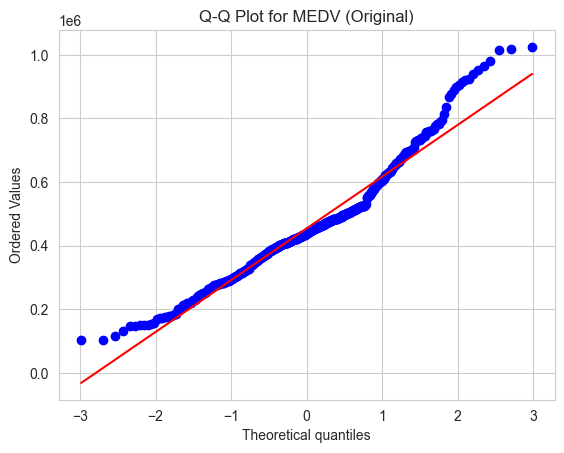

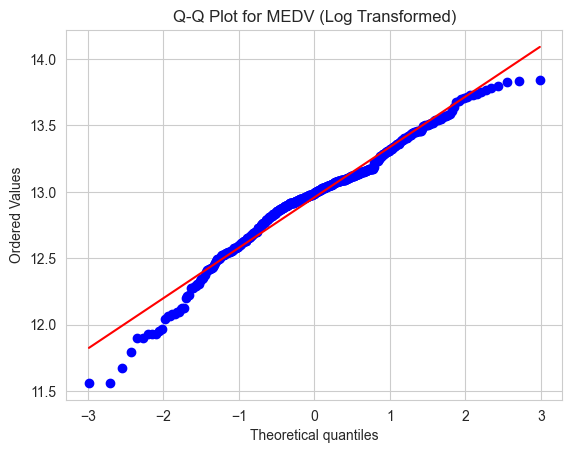

In [48]:
# QQ plot for original MEDV ->Visual check for normality
stats.probplot(df['MEDV'], dist="norm", plot=plt) #creates probability plot, specifies theoretical distribution to check normal distribution

plt.title("Q-Q Plot for MEDV (Original)")
plt.show()

# QQ plot for Log Transformed MEDV
stats.probplot(df['MEDV_log'], dist="norm", plot=plt)
plt.title("Q-Q Plot for MEDV (Log Transformed)")
plt.show()

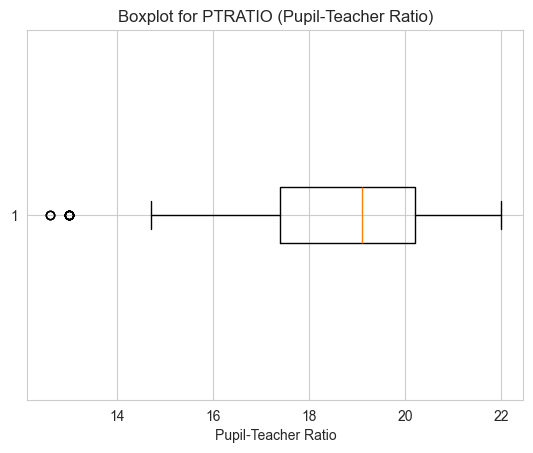

In [49]:

# Create a boxplot for PTRATIO (Pupil-Teacher Ratio)->to visualize distribution

plt.boxplot(df['PTRATIO'], vert=False) #should be horizontal instead of default vertical orientation

plt.title('Boxplot for PTRATIO (Pupil-Teacher Ratio)')
plt.xlabel('Pupil-Teacher Ratio') #Labels the horizontal axis with a descriptive title

plt.show()

In [50]:
# Calculating skewness
data_skewness = df.skew()
print(f'Skewness of the data: {data_skewness}')

Skewness of the data: RM                 0.081565
LSTAT              0.905561
PTRATIO           -0.820578
MEDV               0.775082
MEDV_log          -0.583490
MEDV_boxcox        0.021156
MEDV_reciprocal    0.000000
MEDV_sqrt          0.129578
dtype: float64


                                  USA CARS
    

In [51]:
dm=pd.read_csv('usa_cars.csv')
dm.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


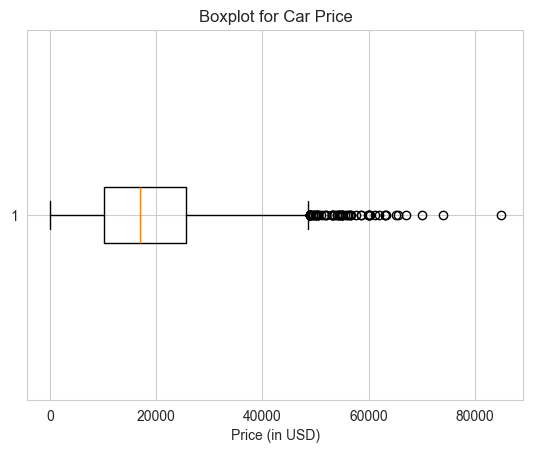

In [52]:
# Create a boxplot for price
plt.boxplot(dm['price'], vert=False)
plt.title('Boxplot for Car Price')
plt.xlabel('Price (in USD)')
plt.show()


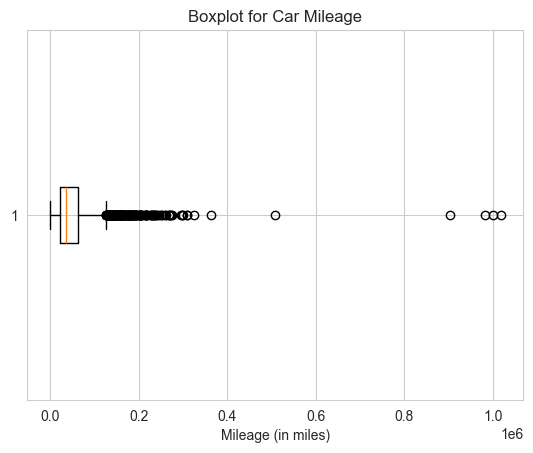

In [53]:
# Create a boxplot for mileage
plt.boxplot(dm['mileage'], vert=False)
plt.title('Boxplot for Car Mileage')
plt.xlabel('Mileage (in miles)')
plt.show()


In [54]:

# Calculate skewness for the large dataset
skewness_price = dm['price'].skew()
skewness_mileage = dm['mileage'].skew()

print("Skewness of price:", skewness_price)
print("Skewness of mileage:", skewness_mileage)

Skewness of price: 0.9227307836499805
Skewness of mileage: 7.0793210165347915


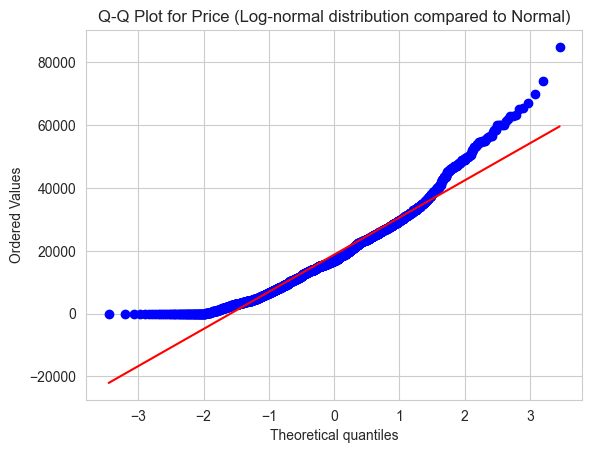

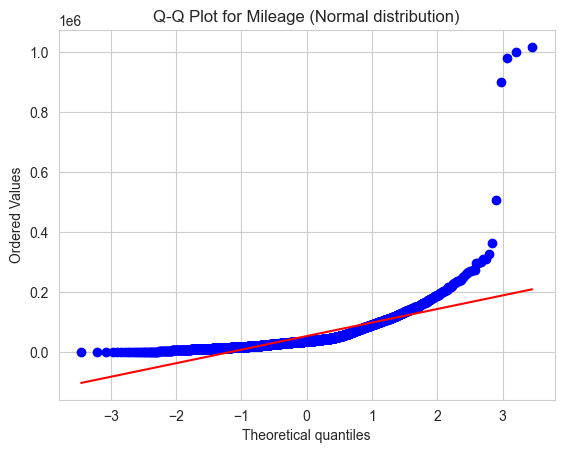

In [55]:

import matplotlib.pyplot as plt
import scipy.stats as stats


# Q-Q Plot for comparing two datasets (price and mileage)
stats.probplot(dm['price'], dist="norm", plot=plt)  # Q-Q plot against normal distribution for price
plt.title("Q-Q Plot for Price (Log-normal distribution compared to Normal)")
plt.show()

stats.probplot(dm['mileage'], dist="norm", plot=plt)  # Q-Q plot against normal distribution for mileage
plt.title("Q-Q Plot for Mileage (Normal distribution)")
plt.show()